# Lumen Data Science

PyTissue

Update or install important libraries

In [1]:
if False:
    !pip install -Uqq fastai
    !pip install -Uqq librosa

In [2]:
from fastai.data.all import *
from fastai.vision.all import *
import librosa
import re
import itertools
import matplotlib.pyplot as plot
sys.path.append('../')

/home/rangoiv/mambaforge/envs/fastai/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Label getters

In [3]:
path = Path("../Dataset/Dataset/IRMAS_Validation_Data/")
get_song_files = FileGetter(extensions='.wav', recurse=True)
files = get_song_files(path)
print(f"(#{len(files)})", files[:6])

(#2874) [Path('../Dataset/Dataset/IRMAS_Validation_Data/(02) dont kill the whale-1.wav'), Path('../Dataset/Dataset/IRMAS_Validation_Data/(02) dont kill the whale-11.wav'), Path('../Dataset/Dataset/IRMAS_Validation_Data/(02) dont kill the whale-12.wav'), Path('../Dataset/Dataset/IRMAS_Validation_Data/(02) dont kill the whale-13.wav'), Path('../Dataset/Dataset/IRMAS_Validation_Data/(02) dont kill the whale-14.wav'), Path('../Dataset/Dataset/IRMAS_Validation_Data/(02) dont kill the whale-15.wav')]


In [253]:
def is_IRMAS_train(pat: Path):
    return str(pat).find("IRMAS_Training_Data") != -1

def is_IRMAS_valid(pat: Path):
    return str(pat).find("IRMAS_Validation_Data") != -1
    
song_path = Path("../Dataset/Dataset/IRMAS_Validation_Data/(02) dont kill the whale-2.wav")
is_IRMAS_train(song_path), is_IRMAS_valid(song_path)

(False, True)

In [254]:
def get_IRMAS_train_label(pat: Path):
    r = re.search("\[[^(\[\])]+\]", pat.name)
    if r:
        return [r.group()[1:-1]]
    return []
song_path = Path("../Dataset/Dataset/IRMAS_Training_Data/cel/[cel][cla]0001__1.wav")
get_IRMAS_train_label(song_path)

['cel']

In [255]:
def get_IRMAS_valid_label(pat: Path):
    with open(os.path.splitext(str(pat))[0] + ".txt") as file:
        return file.read().split()
song_path = Path("../Dataset/Dataset/IRMAS_Validation_Data/(02) dont kill the whale-2.wav")
get_IRMAS_valid_label(song_path)

['gel', 'voi']

In [256]:
def get_label(pat: Path):
    if is_IRMAS_train(pat):
        return get_IRMAS_train_label(pat)
    if is_IRMAS_valid(pat):
        return get_IRMAS_valid_label(pat)
song_path = Path("../Dataset/Dataset/IRMAS_Validation_Data/(02) dont kill the whale-2.wav")
get_label(song_path)

['gel', 'voi']

## Get items

In [100]:
n_fft = 1024
hop_length = 512
f_min = 20
f_max = 8000
sample_rate = 44100

In [275]:
def get_song(pat: Path):
    clip = librosa.load(pat, sr=None)[0]
    clip = clip[:sample_rate*3]
    return clip

In [276]:
def get_spec(clip):
    stft = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
    return stft

In [277]:
def spec2mag(stft):
    stft_magnitude, _ = librosa.magphase(stft)
    stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude)
    return stft_magnitude_db

In [278]:
def get_magspec(pat: Path):
    return spec2mag(get_spec(get_song(pat)))

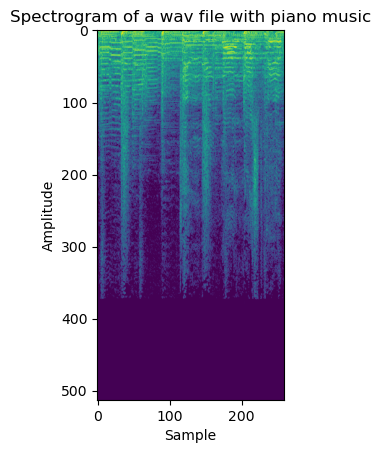

In [279]:
def plot_magspec(stft_magnitude_db):
    plot.title('Spectrogram of a wav file with piano music')
    plot.imshow(spec)
    plot.xlabel('Sample')
    plot.ylabel('Amplitude')
    
song_path = Path("../Dataset/Dataset/IRMAS_Validation_Data/(02) dont kill the whale-2.wav")
spec = get_magspec(song_path)
plot_magspec(spec)

## Data augmentation

Combine two or more music files

In [35]:
from random import shuffle
def MultipleGetter(s=0.5):
    def multiple_file_getters(files: List[Path]):
        shuffle(files)
        lens = np.random.poisson(s, len(files))+1
        i = 0
        grouped_files = []
        for l in lens:
            grouped_files.append(files[i:i+l])
            i = i + l
            if i >= len(files):
                return grouped_files
    return multiple_file_getters
MultipleGetter()(FileGetter(extensions='.wav', recurse=True)(path))[:6]

[(#3) [Path('../Dataset/Dataset/IRMAS_Validation_Data/01 Volunteered Slavery-4.wav'),Path('../Dataset/Dataset/IRMAS_Validation_Data/03 LEE MORGAN - THE SIDEWINDER-3.wav'),Path('../Dataset/Dataset/IRMAS_Validation_Data/01-mogwai-i_m_jim_morrison_i_m_dead-cocmp3-20.wav')],
 (#2) [Path("../Dataset/Dataset/IRMAS_Validation_Data/1 - Hank's Other Bag-14.wav"),Path('../Dataset/Dataset/IRMAS_Validation_Data/Partido Alto-3.wav')],
 (#2) [Path('../Dataset/Dataset/IRMAS_Validation_Data/AC DC (Back In Black) -01- Hells Bells-6.wav'),Path('../Dataset/Dataset/IRMAS_Validation_Data/05 - Sonata in A minor, Op. post. 143 D.784 - I. Allegro giusto-16.wav')],
 (#2) [Path('../Dataset/Dataset/IRMAS_Validation_Data/01) Bert Jansch - Avocet-19.wav'),Path('../Dataset/Dataset/IRMAS_Validation_Data/Deftones - Hexagram-13.wav')],
 (#1) [Path('../Dataset/Dataset/IRMAS_Validation_Data/01 - Honky Cat-22.wav')],
 (#2) [Path("../Dataset/Dataset/IRMAS_Validation_Data/01 Organ Grinder's Swing-7.wav"),Path('../Dataset/D

In [267]:
def Combine(f_chain: List):
    def fun(x):
        for f in f_chain:
            x = f(x)
        return x
    return fun
Combine([FileGetter(extensions='.wav', recurse=True), MultipleGetter()])(path)[:6]

[(#1) [Path('../Dataset/Dataset/IRMAS_Validation_Data/Faith No More - Stripsearch-16.wav')],
 (#2) [Path('../Dataset/Dataset/IRMAS_Validation_Data/02 bwv 1068 air on g string-10.wav'),Path('../Dataset/Dataset/IRMAS_Validation_Data/03 - Symptom of the Universe-19.wav')],
 (#1) [Path('../Dataset/Dataset/IRMAS_Validation_Data/06 - The partisan-14.wav')],
 (#2) [Path("../Dataset/Dataset/IRMAS_Validation_Data/04 I Can't Say-9.wav"),Path('../Dataset/Dataset/IRMAS_Validation_Data/05 - Sonata in A minor, Op. post. 143 D.784 - I. Allegro giusto-1.wav')],
 (#1) [Path('../Dataset/Dataset/IRMAS_Validation_Data/Debussy, Violin Sonata - 1 Allegro vivo-5.wav')],
 (#1) [Path('../Dataset/Dataset/IRMAS_Validation_Data/Zamfir - The Lonely Shepherd - 01 - The Lonely Shepherd-12.wav')]]

In [260]:
from IPython.display import Audio
x = get_song(Path("../Dataset/Dataset/IRMAS_Training_Data/cel/[cel][cla]0001__3.wav"))
y = get_song(Path("../Dataset/Dataset/IRMAS_Training_Data/cel/[cel][cla]0002__3.wav"))
z = 0.5*(x + y)

Audio(data=z, rate=sr)

In [360]:
def AddSongs(gs, s=0.5, lim=0.5):
    def add_songs(t):
        songs = [gs(pat) for pat in t]
        ran = np.random.normal(1, s, len(songs))
        ran[np.where((ran > 1+lim) | (ran < 1-lim))] = 1
        return sum(s*r for s, r in zip(songs, ran))
    return add_songs

In [361]:
song_1 = Path("../Dataset/Dataset/IRMAS_Training_Data/cel/[cel][cla]0002__3.wav")
song_2 = Path("../Dataset/Dataset/IRMAS_Training_Data/cel/[cel][cla]0001__3.wav")
z = AddSongs(get_song, 0.5, 0.7)([song_1, song_2])

Audio(data=z, rate=sr)

In [374]:
def AddLabels(gl):
    def add_labels(files: List[Path]):
        return list(set([l for pat in files for l in gl(pat)]))
    return lambda t: add_labels(t)
song_1 = Path("../Dataset/Dataset/IRMAS_Training_Data/cel/[cel][cla]0001__3.wav")
song_2 = Path("../Dataset/Dataset/IRMAS_Training_Data/flu/[flu][cla]0346__1.wav")
AddLabels(get_label)([song_1, song_2])

['cel', 'flu']

## Creating metrics

In [375]:
def acc(x, y):
    return 1 - (((x > 0.5).float() - y).abs()).float().mean()
acc(torch.tensor([[0.1, 0.9, 0.4], [0.2, 0.2, 0.6]]), torch.tensor([[1, 1, 0], [0, 0, 1]]))

tensor(0.8333)

## Building Dataloaders

In [376]:
sdbl = DataBlock(
    blocks = [ImageBlock(), MultiCategoryBlock],
    n_inp = 1,
    get_items = Combine([get_song_files, MultipleGetter()]),
    splitter = RandomSplitter(),
    get_x = Combine([AddSongs(get_song), get_spec, spec2mag]), 
    get_y = AddLabels(get_label)
)

In [377]:
dls = sdbl.dataloaders(path, bs=64)

In [378]:
print(len(dls.train.dataset))
print(len(dls.valid.dataset))
dls.train

1534
383


In [379]:
# sdbl.summary(path)
print(dls.vocab)
# dls.train.show_batch()

['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']


## Track GPU usage

In [380]:
torch.cuda.is_available(), torch.cuda.device_count(), torch.cuda.current_device()

(True, 1, 0)

In [381]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1070'

In [382]:
import gc
def report_gpu():
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
    gc.collect()
    torch.cuda.empty_cache()

In [383]:
report_gpu()

Memory Usage:
Allocated: 0.0 GB
Cached:    0.2 GB


## Building the model

In [384]:
learn = vision_learner(dls, resnet18, metrics=acc)
learn.fine_tune(1)

/home/rangoiv/mambaforge/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rangoiv/mambaforge/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,acc,time
0,0.965599,0.736149,0.680038,00:41


epoch,train_loss,valid_loss,acc,time
0,0.778955,0.702456,0.697128,00:39


## Gradient Accumulation

In [ ]:
def train(arch, accum=1, finetune=True, epochs=12, bs=64):
    _dls = DataBlock(
        blocks = [ImageBlock(), MultiCategoryBlock],
        get_items = get_song_files,
        splitter = RandomSplitter(),
        get_x = get_magspec,
        get_y = get_label
    ).dataloaders(path, bs=bs)
    cbs = GradientAccumulation(64) if accum else []
    learn = vision_learner(_dls, arch, metrics=acc, cbs=cbs).to_fp16()
    if finetune:
        learn.fine_tune(epochs, 0.01)
        # return learn.tta(dl=dls.test_dl(tst_files))
    else:
        learn.unfreeze()
        learn.fit_one_cycle(epochs, 0.01)

In [ ]:
# train(resnet18, epochs=6)